# Preparing the data for modeling

## Subsetting the dataset
 
When our flat-file is ready for modeling we have to procede to generate the partitions that we will use for modeling. No matter which method we will use for training our data, we have to generate first a test dataset. This test dataset has to be set on hold aside and only used at the end of the whole process of training and selecting the best model.
 
After we selected the test dataset we proceed to use the rest of the data for training the models. There are three main strategies for that:
 
* Dividing into train and dev
* Using Cross-validation
* Using Bootstrapping


## Test dataset

In [1]:
data <- read.table(unz("../data/BlackFriday.csv.zip", "BlackFriday.csv"), 
                   header=T, quote="\"", sep=",")

In [2]:
head(data)

User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
1000001,P00069042,F,0-17,10,A,2,0,3,NA,NA,8370
1000001,P00248942,F,0-17,10,A,2,0,1,6,14,15200
1000001,P00087842,F,0-17,10,A,2,0,12,NA,NA,1422
1000001,P00085442,F,0-17,10,A,2,0,12,14,NA,1057
1000002,P00285442,M,55+,16,C,4+,0,8,NA,NA,7969
1000003,P00193542,M,26-35,15,A,3,0,1,2,NA,15227


In [3]:
data$Occupation <- factor(data$Occupation)
data$Marital_Status <- factor(data$Marital_Status)
data$Product_Category_1 <- factor(data$Product_Category_1)
data$Product_Category_2 <- factor(ifelse(is.na(data$Product_Category_2),0,data$Product_Category_2))
data$Product_Category_3 <- factor(ifelse(is.na(data$Product_Category_3),0,data$Product_Category_3))


In [4]:
summary(data)

    User_ID            Product_ID     Gender        Age        
 Min.   :1000001   P00265242:  1858   F:132197   0-17 : 14707  
 1st Qu.:1001495   P00110742:  1591   M:405380   18-25: 97634  
 Median :1003031   P00025442:  1586              26-35:214690  
 Mean   :1002992   P00112142:  1539              36-45:107499  
 3rd Qu.:1004417   P00057642:  1430              46-50: 44526  
 Max.   :1006040   P00184942:  1424              51-55: 37618  
                   (Other)  :528149              55+  : 20903  
   Occupation     City_Category Stay_In_Current_City_Years Marital_Status
 4      : 70862   A:144638      0 : 72725                  0:317817      
 0      : 68120   B:226493      1 :189192                  1:219760      
 7      : 57806   C:166446      2 : 99459                                
 1      : 45971                 3 : 93312                                
 17     : 39090                 4+: 82889                                
 20     : 32910                             

In [5]:
vn <- setdiff(names(data),c("Product_ID","User_ID"))

In [6]:
#library(devtools)
#install_github("karpatit/mechkar")
require(mechkar)

Loading required package: mechkar


In [7]:
Table1(data = data,x = vn,y = "City_Category")

  |===============================================================       |  90%

V1,V2,Pop,A,B,C,pval
Individuals,n,537577,144638,226493,166446,NA
Gender,F,"132,197 (24.6%)","34,807 (24.1%)","56,494 (24.9%)","40,896 (24.6%)",NA
Gender,M,"405,380 (75.4%)","109,831 (75.9%)","169,999 (75.1%)","125,550 (75.4%)",0
Age,0-17,"14,707 (2.7%)","2,497 (1.7%)","5,288 (2.3%)","6,922 (4.2%)",NA
Age,18-25,"97,634 (18.2%)","27,025 (18.7%)","42,470 (18.8%)","28,139 (16.9%)",0
Age,26-35,"214,690 (39.9%)","72,048 (49.8%)","89,767 (39.6%)","52,875 (31.8%)",NA
Age,36-45,"107,499 (20.0%)","26,142 (18.1%)","46,605 (20.6%)","34,752 (20.9%)",NA
Age,46-50,"44,526 (8.3%)","7,467 (5.2%)","19,900 (8.8%)","17,159 (10.3%)",NA
Age,51-55,"37,618 (7.0%)","5,969 (4.1%)","17,435 (7.7%)","14,214 (8.5%)",NA
Age,55+,"20,903 (3.9%)","3,490 (2.4%)","5,028 (2.2%)","12,385 (7.4%)",NA


In [23]:
############### TRAIN_TEST #######################
train_test <- function(data=NULL,train_name=NULL,test_name=NULL,prop=NULL,seed=123,tableone=False)
{
  checkTrainTest <- function(train=NULL,test=NULL) {
     train[["traintest_ind_"]] <- 1
     test[["traintest_ind_"]] <- 2
     data <- rbind(train, test)
     tab <- Table1(data=data, y="traintest_ind_",x=names(train),messages = F)
     vars <- subset(tab, pval < 0.05)$V1
     if (length(vars)==1) {
        message("You got a perfectly balanced training and test datasets")
        message(" ")
     } else {
        message("WARNING: The following variables are not balanced between the training and test datasets:")
       for (v in vars) { message(paste("*",v)) }
          message("You can try to change the seed value until you get a balanced partition.")
          message("Alternatively, you can ommit this warning and exclude those variables from your model")
          message(" ")
       }
       return(tab)
  }
  ## set the seed to make your partition reproductible
  set.seed(seed)
  smp_size <- floor(prop * nrow(data))
  train_ind <- sample(seq_len(nrow(data)), size = smp_size)
  assign(train_name, data[train_ind, ], envir=globalenv())
  assign(test_name, data[-train_ind, ], envir=globalenv())
  tab = checkTrainTest(get(train_name),get(test_name))
  message(paste("Dataset partitioned into:"))
  message(paste(" + Train dataset:", train_name))
  message(paste(" + Test dataset:", test_name))
  if(tableone==TRUE) {
     return(tab)
  } 
}

## Test dataset

In [8]:
tab1 <- train_test(data = data[,vn], train_name = "temp", test_name = "test",prop = 0.8, seed = 123, tableone=T)

Dataset partitioned into:
 + Train dataset: temp
 + Test dataset: test


  |================================================================      |  91%

 
You got a perfectly balanced training and test datasets
 


In [9]:
dim(temp)
dim(test)

[1] 430061     10

[1] 107516     10

In [10]:
tab1

V1,V2,Pop,1,2,pval
Individuals,n,537577,430061,107516,NA
Gender,F,"132,197 (24.6%)","105,825 (24.6%)","26,372 (24.5%)",NA
Gender,M,"405,380 (75.4%)","324,236 (75.4%)","81,144 (75.5%)",0.595
Age,0-17,"14,707 (2.7%)","11,739 (2.7%)","2,968 (2.8%)",NA
Age,18-25,"97,634 (18.2%)","78,303 (18.2%)","19,331 (18.0%)",0.588
Age,26-35,"214,690 (39.9%)","171,743 (39.9%)","42,947 (39.9%)",NA
Age,36-45,"107,499 (20.0%)","85,905 (20.0%)","21,594 (20.1%)",NA
Age,46-50,"44,526 (8.3%)","35,577 (8.3%)","8,949 (8.3%)",NA
Age,51-55,"37,618 (7.0%)","30,032 (7.0%)","7,586 (7.1%)",NA
Age,55+,"20,903 (3.9%)","16,762 (3.9%)","4,141 (3.9%)",NA


## Train and Dev

In [11]:
tab2 <- train_test(data = temp[,vn], train_name = "train", test_name = "dev",prop = 0.8, seed = 123, tableone=T)

Dataset partitioned into:
 + Train dataset: train
 + Test dataset: dev


  |================================================================      |  91%

 
You got a perfectly balanced training and test datasets
 


In [12]:
dim(train)
dim(dev)

[1] 344048     10

[1] 86013    10

In [13]:
tab2

V1,V2,Pop,1,2,pval
Individuals,n,430061,344048,86013,NA
Gender,F,"105,825 (24.6%)","84,622 (24.6%)","21,203 (24.7%)",NA
Gender,M,"324,236 (75.4%)","259,426 (75.4%)","64,810 (75.3%)",0.741
Age,0-17,"11,739 (2.7%)","9,334 (2.7%)","2,405 (2.8%)",NA
Age,18-25,"78,303 (18.2%)","62,697 (18.2%)","15,606 (18.1%)",0.329
Age,26-35,"171,743 (39.9%)","137,443 (39.9%)","34,300 (39.9%)",NA
Age,36-45,"85,905 (20.0%)","68,621 (19.9%)","17,284 (20.1%)",NA
Age,46-50,"35,577 (8.3%)","28,491 (8.3%)","7,086 (8.2%)",NA
Age,51-55,"30,032 (7.0%)","24,124 (7.0%)","5,908 (6.9%)",NA
Age,55+,"16,762 (3.9%)","13,338 (3.9%)","3,424 (4.0%)",NA


In [14]:
### save memeory, remove the datasets that will not be used more...
rm(temp,data)

Checking the distribution of the outcome on the three subsets

Loading required package: ggplot2


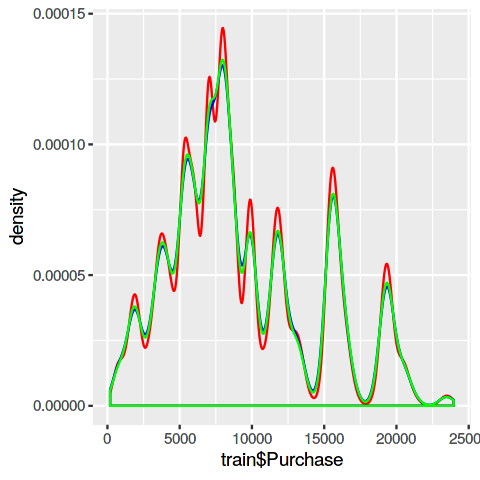

In [15]:
require(ggplot2)

options(repr.plot.width = 4, repr.plot.height = 4)

ggplot() +
    geom_density(aes(x=train$Purchase),color="red",alpha=0.3) +
    geom_density(aes(x=dev$Purchase),color="blue",alpha=0.3) +
    geom_density(aes(x=test$Purchase),color="green",alpha=0.3)


# Train-Dev

In [16]:
library(ranger)

mod1 <- ranger(Purchase ~., data=train)


Growing trees.. Progress: 12%. Estimated remaining time: 3 minutes, 47 seconds.
Growing trees.. Progress: 24%. Estimated remaining time: 3 minutes, 14 seconds.
Growing trees.. Progress: 34%. Estimated remaining time: 3 minutes, 3 seconds.
Growing trees.. Progress: 44%. Estimated remaining time: 2 minutes, 40 seconds.
Growing trees.. Progress: 54%. Estimated remaining time: 2 minutes, 12 seconds.
Growing trees.. Progress: 65%. Estimated remaining time: 1 minute, 41 seconds.
Growing trees.. Progress: 77%. Estimated remaining time: 1 minute, 9 seconds.
Growing trees.. Progress: 85%. Estimated remaining time: 47 seconds.
Growing trees.. Progress: 94%. Estimated remaining time: 20 seconds.
Computing prediction error.. Progress: 57%. Estimated remaining time: 23 seconds.


In [ ]:
mod1

In [ ]:
pred1 <- predict(mod1, newdata=test)


# Cross-Validation

<img src="https://genome.tugraz.at/proclassify/help/pages/images/xv_folds.gif"/>


In [25]:
library(caret)
# load the iris dataset
data(iris)

Loading required package: lattice


In [43]:
# define training control
trControl <- trainControl(method = "repeatedcv", repeats = 5, seeds = 22)
# train the model
model <- train(Species~., data=iris, trControl=train_control, method="ctree")

In [44]:
# summarize results
print(model)

Conditional Inference Tree 

150 samples
  4 predictors
  3 classes: 'setosa', 'versicolor', 'virginica' 

No pre-processing
Resampling: Leave-One-Out Cross-Validation 
Summary of sample sizes: 149, 149, 149, 149, 149, 149, ... 
Resampling results across tuning parameters:

  mincriterion  Accuracy   Kappa
  0.01          0.9333333  0.9  
  0.50          0.9333333  0.9  
  0.99          0.9333333  0.9  

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was mincriterion = 0.99.


# Leave-one-out Cross Validation

In [39]:
# define training control
train_control <- trainControl(method="LOOCV")
# train the model
model <- train(Species~., data=iris, trControl=train_control, method="ctree")

In [40]:
# summarize results
print(model)

Conditional Inference Tree 

150 samples
  4 predictors
  3 classes: 'setosa', 'versicolor', 'virginica' 

No pre-processing
Resampling: Leave-One-Out Cross-Validation 
Summary of sample sizes: 149, 149, 149, 149, 149, 149, ... 
Resampling results across tuning parameters:

  mincriterion  Accuracy   Kappa
  0.01          0.9333333  0.9  
  0.50          0.9333333  0.9  
  0.99          0.9333333  0.9  

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was mincriterion = 0.99.


In [41]:
?caret::trainControl

In [ ]:
?carer::train

# Boostrapping



In [37]:
# define training control
train_control <- trainControl(method="boot", number=100)
# train the model
model <- train(Species~., data=iris, trControl=train_control,method="ctree")

In [38]:
# summarize results
print(model)

Conditional Inference Tree 

150 samples
  4 predictors
  3 classes: 'setosa', 'versicolor', 'virginica' 

No pre-processing
Resampling: Bootstrapped (100 reps) 
Summary of sample sizes: 150, 150, 150, 150, 150, 150, ... 
Resampling results across tuning parameters:

  mincriterion  Accuracy   Kappa    
  0.01          0.9432746  0.9140960
  0.50          0.9432746  0.9140960
  0.99          0.9434500  0.9143576

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was mincriterion = 0.99.


# Dataset Inbalance

In [17]:
if(!require(imbalance)){install.packages("imbalance");require(imbalance)}
### ROSE = Random Over-Sampling Examples
if(!require(ROSE)){install.packages("ROSE");require(ROSE)}


Loading required package: imbalance
Loading required package: ROSE
Loaded ROSE 0.0-3



In [18]:
data(newthyroid1)
head(newthyroid1)

T3resin,Thyroxin,Triiodothyronine,Thyroidstimulating,TSH_value,Class
105,7.3,1.5,1.5,-0.1,negative
67,23.3,7.4,1.8,-0.6,positive
111,8.4,1.5,0.8,1.2,negative
89,14.3,4.1,0.5,0.2,positive
105,9.5,1.8,1.6,3.6,negative
110,20.3,3.7,0.6,0.2,positive


In [19]:
table(newthyroid1$Class)
table(newthyroid1$Class)/nrow(newthyroid1)*100


negative positive 
     180       35 


negative positive 
83.72093 16.27907 

In [20]:
numPositive <- length(which(newthyroid1$Class == "positive"))
numNegative <- length(which(newthyroid1$Class == "negative"))
nInstances <- numNegative - numPositive
cbind(numPositive=numPositive,numNegative=numNegative,nInstances=nInstances)

numPositive,numNegative,nInstances
35,180,145


## Under Sampling
 
This techniques uses all the rows containing the minority class and select randomly the same number of minority class for the rows with the mayority class 

In [21]:
data_balanced_under <- ovun.sample(Class ~ ., data = newthyroid1, method = "under",N = numPositive*2)$data
table(data_balanced_under$Class)


negative positive 
      35       35 

## Over Sampling
 
Over sampling takes the number of rows of the mayority class and repeat the rows of the minority class up to the same number of the mayority class. The repeated rows are selected randomly.

In [57]:
#over sampling
data_balanced_over <- ovun.sample(Class ~ ., data = newthyroid1, method = "over",N = numNegative*2)$data
table(data_balanced_over$Class)


negative positive 
     180      180 

## Over-Under Sampling
 
In this technique we randomly select half of the majority class rows (under sampling) and increment the minority class rows by selecting them randomly.   

In [22]:
#over_under sampling
data_balanced_both <- ovun.sample(Class ~ ., data = newthyroid1, method = "both", p=0.5,N = 180, seed = 1)$data
table(data_balanced_both$Class)


negative positive 
      90       90 

## ROSE (Random Over-Sampling Examples) 
 
Creates a sample of synthetic data by enlarging the features space of minority and majority class examples. ROSE selects an observation belonging to the class k and generates new examples in its neighbourhood

In [23]:
# Rose: 
data.rose <- ROSE(Class ~ ., data = newthyroid1, seed = 1)$data
table(data.rose$Class)


negative positive 
     105      110 

## Oversampling with Synthetic data
 
Additionally to ROSE. The package 'inbalance' has the function pdfos. This function generates synthetic minority examples for a numerical dataset approximating a Gaussian multivariate distribution.


In [24]:
newSamples <- pdfos(dataset = newthyroid1, numInstances = nInstances,classAttr = "Class")
newDataset <- rbind(newthyroid1, newSamples)
table(newDataset$Class)


negative positive 
     180      180 